In [1]:
pip install gwpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 837.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 46.0.3 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.


In [2]:
pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.7/182.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 17.6 MB/s eta 0:00:00
  Created wheel for pegasus-wms.api: filename=pegasus_wms.api-5.1.1-py3-none-any.whl size=5136

In [3]:
pip install gwosc

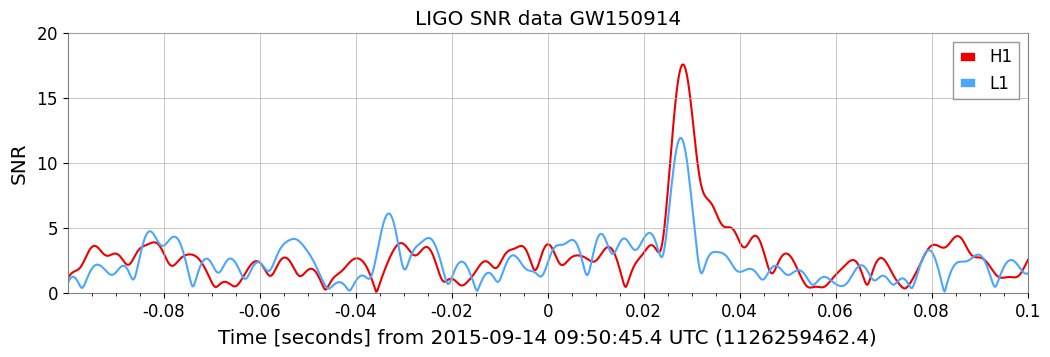

In [28]:
import gwosc.datasets as g
event = 'GW150914-v1'
gps = g.event_gps(event)

from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data("H1", gps-5,gps+5)
high = data.highpass(15)
psd = high.psd(4, 2)
zoom = high.crop(1126259460, 1126259464)
from pycbc.waveform import get_fd_waveform
hp, _ = get_fd_waveform(
    approximant="IMRPhenomD",
    mass1=40,
    mass2=32,
    f_lower=20,
    f_final=2048,
    delta_f=psd.df.value,
)
from pycbc.filter import matched_filter
snr = matched_filter(
    hp,
    zoom.to_pycbc(),
    psd=psd.to_pycbc(),
    low_frequency_cutoff=15,
)
snrts = TimeSeries.from_pycbc(snr).abs()

data_2 = TimeSeries.fetch_open_data("L1", gps-5,gps+5)
high_2 = data_2.highpass(15)
psd_2 = high_2.psd(4, 2)
zoom_2 = high_2.crop(1126259460, 1126259464)

snr_2 = matched_filter(
    hp,
    zoom_2.to_pycbc(),
    psd=psd_2.to_pycbc(),
    low_frequency_cutoff=15,
)
snrts_2 = TimeSeries.from_pycbc(snr_2).abs()
snrts_2.shift('6.9ms')

plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(snrts, label="H1", color="gwpy:ligo-hanford")
ax.plot(snrts_2, label="L1", color="gwpy:ligo-livingston")
ax.set_title("LIGO SNR data GW150914")
ax.set_xlim(gps-.1, gps+.1)
ax.set_ylim(0,20)
ax.set_xscale('seconds',epoch=gps)
ax.set_ylabel("SNR")
ax.legend()
plot.show()